In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import datetime
import matplotlib
import matplotlib.pyplot as plt


import pickle
import joblib

In [2]:
df = pd.read_csv("VehicleJID_reused00400001.csv", low_memory=False)


In [3]:
df

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day
0,264962,1352703391000000,40.0,400001,6434,0,-280,1524,1,2012-11-12 06:56:31,0.0,0
1,264980,1352703407000000,40.0,400001,6424,0,-257,261,1,2012-11-12 06:56:47,0.0,0
2,264982,1352703407000000,40.0,400001,6408,0,-315,2655,1,2012-11-12 06:56:47,0.0,0
3,265016,1352703425000000,40.0,400001,6429,0,-292,1533,1,2012-11-12 06:57:05,0.0,0
4,265024,1352703430000000,40.0,400001,6434,0,-280,1525,1,2012-11-12 06:57:10,39.0,0
5,265085,1352703472000000,40.0,400001,6434,0,-280,1526,1,2012-11-12 06:57:52,81.0,0
6,265112,1352703487000000,40.0,400001,6429,0,-292,1534,1,2012-11-12 06:58:07,62.0,0
7,265131,1352703503000000,40.0,400001,6424,0,-219,270,1,2012-11-12 06:58:23,96.0,0
8,265293,1352703605000000,40.0,400001,6439,0,-197,4937,1,2012-11-12 07:00:05,0.0,0
9,265305,1352703611000000,40.0,400001,6434,0,-264,1586,1,2012-11-12 07:00:11,220.0,0


In [4]:
#df=df[df.AtStop == 1]
df.sort_values(['VehicleJourneyID','Date'], ascending=[1,1])

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day
2150,573654,1353310389000000,40.0,400001,5640,0,0,4592,1,2012-11-19 07:33:09,0.0,0
2176,574807,1353311147000000,40.0,400001,5640,0,-195,1549,1,2012-11-19 07:45:47,758.0,0
2178,574898,1353311206000000,40.0,400001,5640,0,-195,1523,1,2012-11-19 07:46:46,817.0,0
2181,574992,1353311270000000,40.0,400001,5640,0,-210,1524,1,2012-11-19 07:47:50,881.0,0
2183,575118,1353311349000000,40.0,400001,5640,0,-210,1526,1,2012-11-19 07:49:09,960.0,0
2185,575179,1353311388000000,40.0,400001,5640,0,-210,6080,1,2012-11-19 07:49:48,999.0,0
2189,575303,1353311468000000,40.0,400001,5640,0,-188,1585,1,2012-11-19 07:51:08,1079.0,0
2191,575361,1353311509000000,40.0,400001,5640,0,-168,1586,1,2012-11-19 07:51:49,1120.0,0
2193,575461,1353311569000000,40.0,400001,5640,0,-148,1587,1,2012-11-19 07:52:49,1180.0,0
2196,575683,1353311708000000,40.0,400001,5640,0,-102,1606,1,2012-11-19 07:55:08,1319.0,0


In [5]:
df.describe()

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Seconds,Day
count,6276.000000,6.276000e+03,6276.0,6276.0,6276.000000,6276.0,6276.000000,6276.000000,6276.0,6276.000000,6276.0
mean,606899.765456,1.353320e+15,40.0,400001.0,5960.941045,0.0,-291.734544,2247.435468,1.0,2551.212556,0.0
std,261963.258246,4.868424e+11,0.0,0.0,314.374007,0.0,336.353507,1526.400836,0.0,1677.287293,0.0
min,264962.000000,1.352703e+15,40.0,400001.0,5640.000000,0.0,-2007.000000,49.000000,1.0,0.000000,0.0
25%,306269.500000,1.352736e+15,40.0,400001.0,5719.000000,0.0,-450.000000,1535.000000,1.0,1005.000000,0.0
50%,600185.000000,1.353329e+15,40.0,400001.0,5788.000000,0.0,-277.000000,1941.000000,1.0,2431.500000,0.0
75%,926263.000000,1.353921e+15,40.0,400001.0,6357.000000,0.0,-87.000000,2673.000000,1.0,3963.500000,0.0
max,972260.000000,1.353971e+15,40.0,400001.0,6493.000000,0.0,1346.000000,7473.000000,1.0,6497.000000,0.0


In [6]:
gb = df.groupby(['VehicleJourneyID'], group_keys=False)

In [7]:
df.head(10)

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day
0,264962,1352703391000000,40.0,400001,6434,0,-280,1524,1,2012-11-12 06:56:31,0.0,0
1,264980,1352703407000000,40.0,400001,6424,0,-257,261,1,2012-11-12 06:56:47,0.0,0
2,264982,1352703407000000,40.0,400001,6408,0,-315,2655,1,2012-11-12 06:56:47,0.0,0
3,265016,1352703425000000,40.0,400001,6429,0,-292,1533,1,2012-11-12 06:57:05,0.0,0
4,265024,1352703430000000,40.0,400001,6434,0,-280,1525,1,2012-11-12 06:57:10,39.0,0
5,265085,1352703472000000,40.0,400001,6434,0,-280,1526,1,2012-11-12 06:57:52,81.0,0
6,265112,1352703487000000,40.0,400001,6429,0,-292,1534,1,2012-11-12 06:58:07,62.0,0
7,265131,1352703503000000,40.0,400001,6424,0,-219,270,1,2012-11-12 06:58:23,96.0,0
8,265293,1352703605000000,40.0,400001,6439,0,-197,4937,1,2012-11-12 07:00:05,0.0,0
9,265305,1352703611000000,40.0,400001,6434,0,-264,1586,1,2012-11-12 07:00:11,220.0,0


In [8]:
len(df['VehicleJourneyID'].unique())

195

In [9]:
df['Hour']= df['Date']

In [10]:
df.dtypes

Unnamed: 0            int64
Timestamp             int64
LineID              float64
JourneyPatternID      int64
VehicleJourneyID      int64
Congestion            int64
Delay                 int64
StopID                int64
AtStop                int64
Date                 object
Seconds             float64
Day                   int64
Hour                 object
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Timestamp'], unit='us')


In [12]:
df.dtypes

Unnamed: 0                   int64
Timestamp                    int64
LineID                     float64
JourneyPatternID             int64
VehicleJourneyID             int64
Congestion                   int64
Delay                        int64
StopID                       int64
AtStop                       int64
Date                datetime64[ns]
Seconds                    float64
Day                          int64
Hour                        object
dtype: object

In [13]:
for iter in range (len(df)):
    df.iloc[iter,12]=df.iloc[iter, 9].hour

In [14]:
df['Hour'] = df['Hour'].astype('category')
df['Day'] = df['Day'].astype('category')
df['LineID'] = df['LineID'].astype('category')
df['JourneyPatternID'] = df['JourneyPatternID'].astype('category')




In [15]:
df.head(100)

,Unnamed: 0,Timestamp,LineID,JourneyPatternID,VehicleJourneyID,Congestion,Delay,StopID,AtStop,Date,Seconds,Day,Hour
0,264962,1352703391000000,40.0,400001,6434,0,-280,1524,1,2012-11-12 06:56:31,0.0,0,6
1,264980,1352703407000000,40.0,400001,6424,0,-257,261,1,2012-11-12 06:56:47,0.0,0,6
2,264982,1352703407000000,40.0,400001,6408,0,-315,2655,1,2012-11-12 06:56:47,0.0,0,6
3,265016,1352703425000000,40.0,400001,6429,0,-292,1533,1,2012-11-12 06:57:05,0.0,0,6
4,265024,1352703430000000,40.0,400001,6434,0,-280,1525,1,2012-11-12 06:57:10,39.0,0,6
5,265085,1352703472000000,40.0,400001,6434,0,-280,1526,1,2012-11-12 06:57:52,81.0,0,6
6,265112,1352703487000000,40.0,400001,6429,0,-292,1534,1,2012-11-12 06:58:07,62.0,0,6
7,265131,1352703503000000,40.0,400001,6424,0,-219,270,1,2012-11-12 06:58:23,96.0,0,6
8,265293,1352703605000000,40.0,400001,6439,0,-197,4937,1,2012-11-12 07:00:05,0.0,0,7
9,265305,1352703611000000,40.0,400001,6434,0,-264,1586,1,2012-11-12 07:00:11,220.0,0,7


In [16]:
features = ['Hour', 'Day', 'StopID']

X = pd.concat([df[features]], axis=1)
y = df.Seconds

X

,Hour,Day,StopID
0,6,0,1524
1,6,0,261
2,6,0,2655
3,6,0,1533
4,6,0,1525
5,6,0,1526
6,6,0,1534
7,6,0,270
8,7,0,4937
9,7,0,1586


In [17]:
rfc = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1)


In [18]:
rfc.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [19]:
rfc_predictions = rfc.predict(X)


In [20]:
print("The value of R^2", metrics.r2_score(y, rfc_predictions))

The value of R^2 0.948720149043


In [21]:
true_v_pred = pd.DataFrame({'Actual Value': y, 'Predicted Value': rfc_predictions})
true_v_pred

,Actual Value,Predicted Value
0,0.0,69.509159
1,0.0,69.624929
2,0.0,195.512063
3,0.0,15.218000
4,39.0,99.317500
5,81.0,139.408137
6,62.0,69.145833
7,96.0,89.036602
8,0.0,177.171040
9,220.0,589.525378


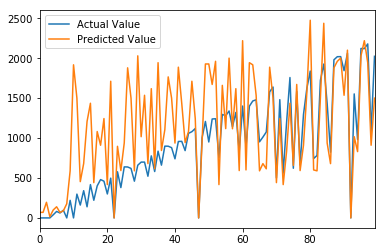

In [22]:
true_v_pred.head(100).plot()

In [23]:
pickle.dump(rfc, open("test1.sav", 'wb'))

In [24]:
pickled_forest =pickle.load(open("test1.sav", 'rb'))


In [36]:
information = [{
                'Hour': 6, 
                'Day': 0,
                'StopID': 245}]
new_df = pd.DataFrame(information)

predictions = pickled_forest.predict(new_df)

In [37]:
predictions

array([ 69.62492857])

In [46]:
information = [{
                'Hour': 6,
                'Day': 0, 
                'StopID': 1586}]
new_df = pd.DataFrame(information)


predictions2 = pickled_forest.predict(new_df)

In [47]:
predictions2

array([ 152.37754322])

In [48]:
predictions2[0]-predictions[0]

82.752614648033102

In [41]:
predictions2[0]-predictions[0]

68.673029137529113

In [42]:
joblib.dump(rfc,'joblibo1.z', compress=3)

['joblibo1.z']

In [43]:
joblib_pred=joblib.load("joblibo1.z")

In [44]:
information = [{
        'Hour': 6,
                'Day': 0, 
                'StopID': 4937}]
new_df = pd.DataFrame(information)



predictions2 = joblib_pred.predict(new_df)

In [45]:
predictions2

array([ 138.29795771])

In [35]:
len(df['JourneyPatternID'].unique())

1